# Genre recognition: experiment

Goal: Test the influence of self-connections in the graph.

Conclusion: No influence.

Observations:

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'diag'
Pvalues = [False, True, False, True]

# Regenerate the graph or the features at each iteration.
regen_graph = True
regen_features = True
regen_baseline = False

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['data_scaling_graph'] = 'features'
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'euclidean'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5
p['majority_voting'] = False

### Data parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Added white noise.
p['noise_std'] = 0

### Numerical parameters

In [4]:
# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['test_size'] = 0.1
p['Ncv'] = 20
p['dataset_classification'] = 'Z'

## Processing

In [5]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms_D']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph, diag = False -------------------- 

Data: (149000, 96), float32
Elapsed time: 186.57 seconds
All self-referenced in the first column: True
dist in [0.0, 1.47963690758]
w in [0.00622187927365, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2404994,), float32
  L_indices : (2404994,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2255994,), float32
  W_indices : (2255994,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = euclidean
  Csigma = 1
  diag = False
  laplacian = normalized
Overall time: 196.24 seconds

 -------------------- Features, diag = False -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288

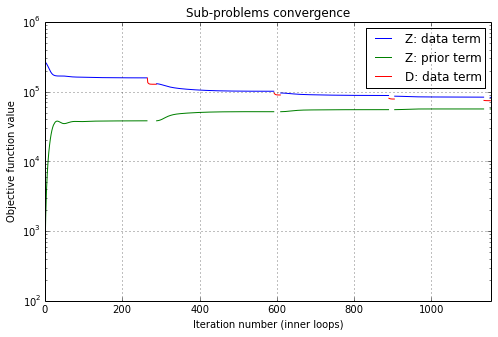

Inner loop: 1156 iterations
g(Z) = ||X-DZ||_2^2 = 7.385632e+04
rdiff: 0.00152335996007
i(Z) = ||Z||_1 = 5.628807e+04
j(Z) = tr(Z^TLZ) = 8.606136e+03


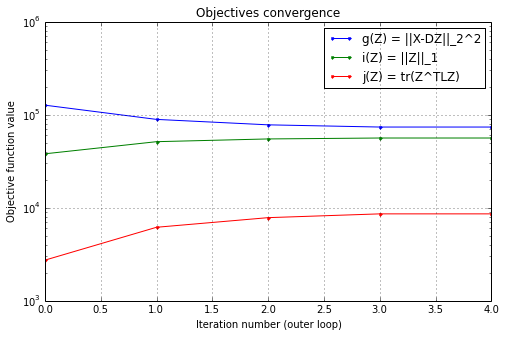

Global objective: 1.387505e+05


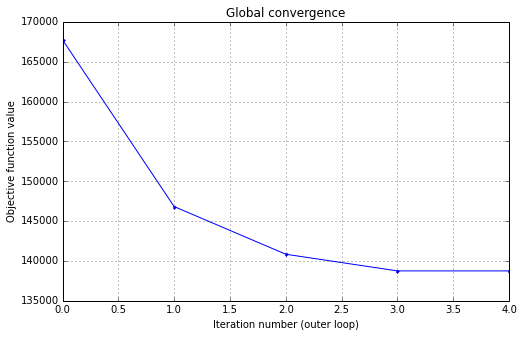

Outer loop: 5 iterations

Z in [-0.163777932525, 1.04219698906]
Sparsity of Z: 3,934,466 non-zero entries out of 19,072,000 entries, i.e. 20.6%.


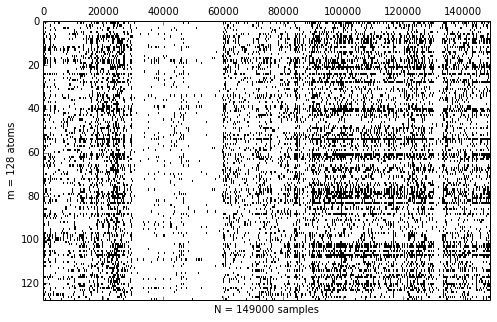

D in [-0.0833246707916, 0.915686309338]
d in [0.999999582767, 1.00000035763]
Constraints on D: True


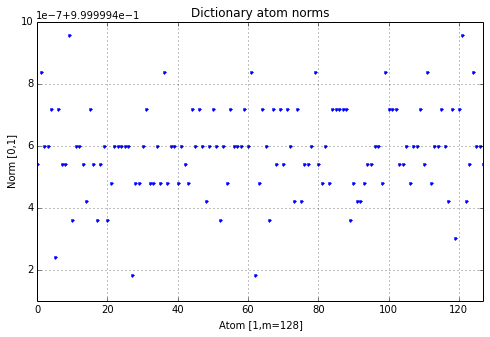

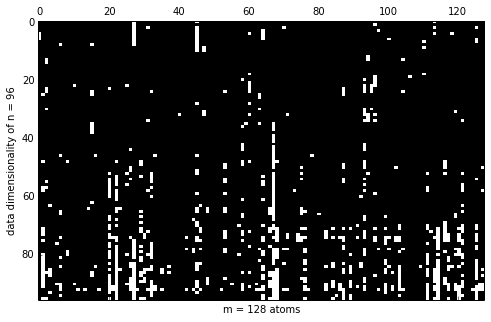

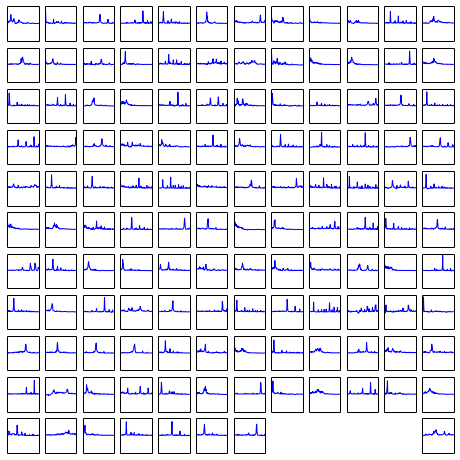

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2462 seconds

 -------------------- Classification, diag = False -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x

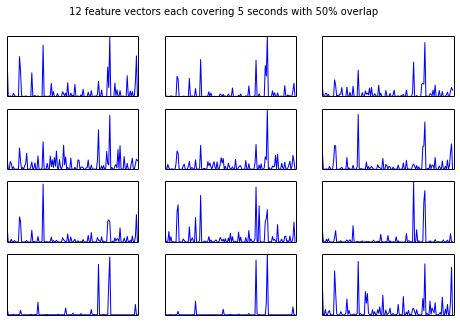

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 74.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.5 %
Clips accuracy: 68.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  75 (+/- 1.9) <- [77 74 78 74 71 78 74 75 76 75]
  76 (+/- 1.0) <- [76 76 75 74 76 77 76 77 76 77]
  77 (+/- 1.4) <- [76 76 76 78 77 78 78 76 77 73]
  76 (+/- 1.3) <- [76 74 74 76 77 77 76 75 78 75]
  76 (+/- 1.4) <- [77 76 74 76 74 76 79 77 76 75]
  77 (+/- 1.0) <- [77 75 76 77 77 77 75 75 75 75]
  76 (+/- 1.5) <- [75 75 77 78 75 72 77 75 76 77]
  76 (+/- 1.6) <- [74 75 78 77 74 77 74 73 77 77]
  76 (+/- 1.6) <- [7

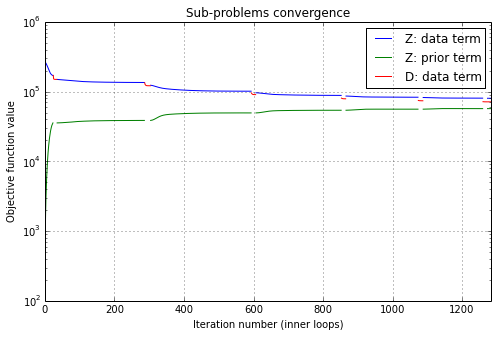

Inner loop: 1285 iterations
g(Z) = ||X-DZ||_2^2 = 7.118636e+04
rdiff: 3.93031988688e-05
i(Z) = ||Z||_1 = 5.692668e+04
j(Z) = tr(Z^TLZ) = 8.863541e+03


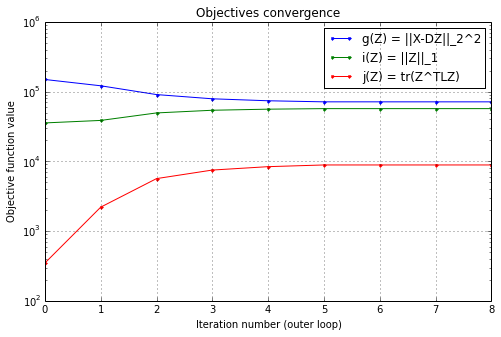

Global objective: 1.369766e+05


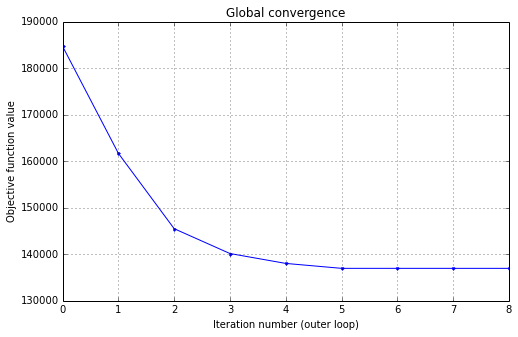

Outer loop: 9 iterations

Z in [-0.174222588539, 1.03444206715]
Sparsity of Z: 3,716,594 non-zero entries out of 19,072,000 entries, i.e. 19.5%.


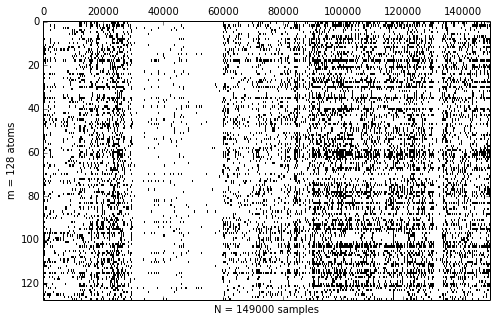

D in [-0.0244731716812, 0.894932925701]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


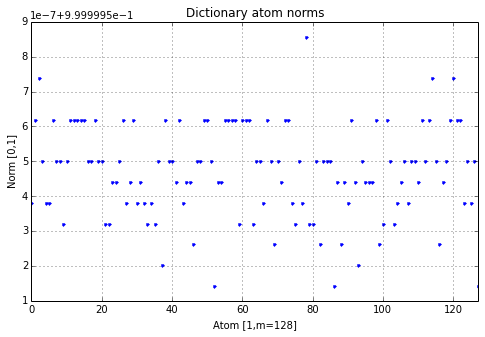

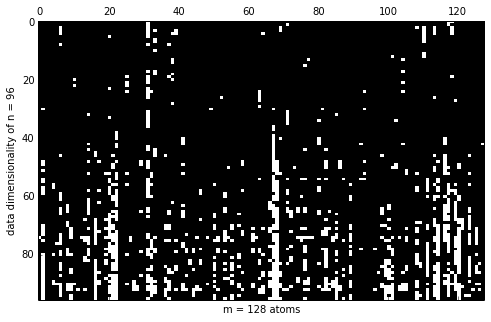

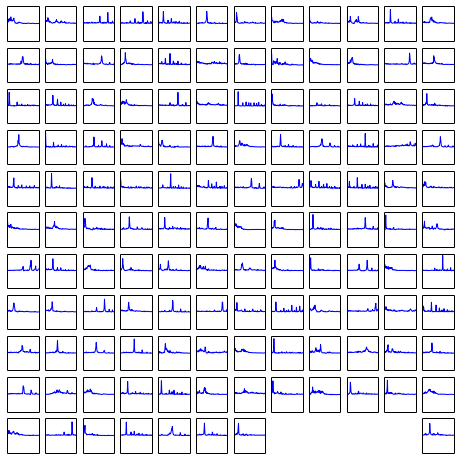

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2752 seconds

 -------------------- Classification, diag = True -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x 

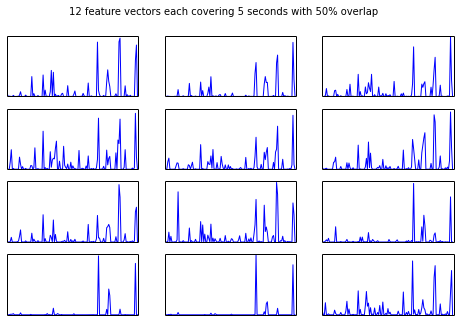

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.4 %
Clips accuracy: 72.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  77 (+/- 1.8) <- [77 75 76 78 73 77 75 79 75 76]
  78 (+/- 1.6) <- [75 79 77 74 80 77 78 78 77 79]
  79 (+/- 1.2) <- [80 77 79 78 80 80 80 77 80 78]
  78 (+/- 2.1) <- [78 72 79 79 79 80 78 79 80 78]
  78 (+/- 0.9) <- [79 77 79 78 77 78 79 77 78 77]
  79 (+/- 1.4) <- [78 77 77 79 79 81 77 79 77 78]
  78 (+/- 1.2) <- [79 77 78 78 79 76 79 77 76 78]
  78 (+/- 1.5) <- [75 80 79 76 78 79 77 77 75 79]
  78 (+/- 1.2) <- [7

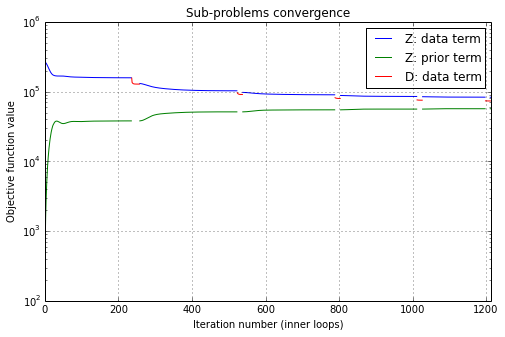

Inner loop: 1215 iterations
g(Z) = ||X-DZ||_2^2 = 7.319667e+04
rdiff: 0.00118013341358
i(Z) = ||Z||_1 = 5.671479e+04
j(Z) = tr(Z^TLZ) = 9.658946e+03


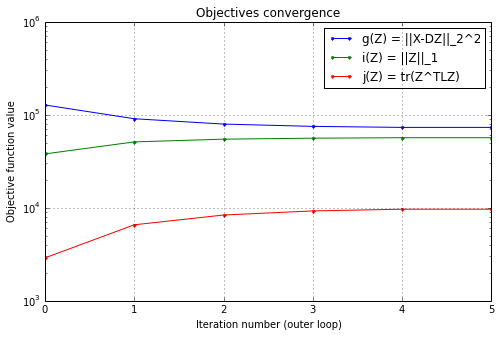

Global objective: 1.395704e+05


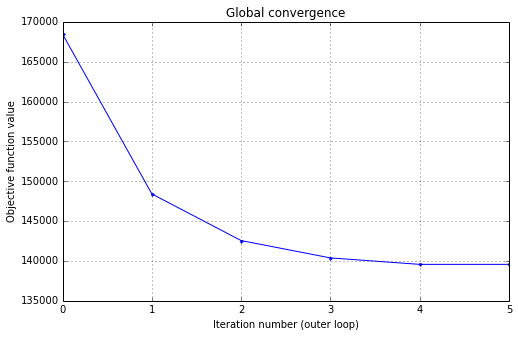

Outer loop: 6 iterations

Z in [-0.140299916267, 0.973475933075]
Sparsity of Z: 3,814,482 non-zero entries out of 19,072,000 entries, i.e. 20.0%.


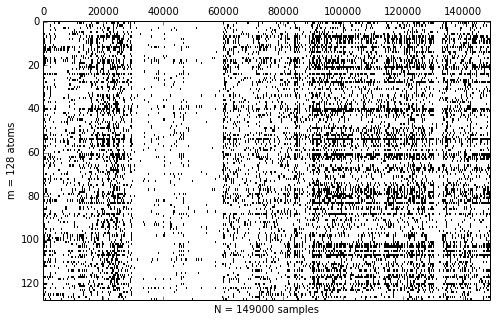

D in [-0.0646789371967, 0.919089734554]
d in [0.999999582767, 1.00000023842]
Constraints on D: True


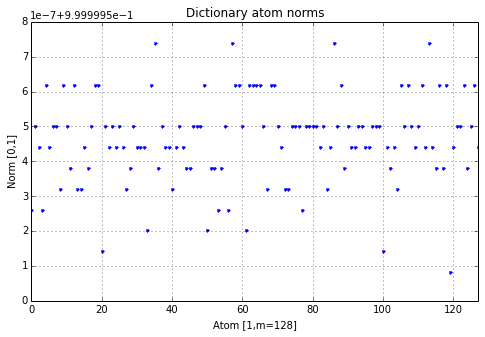

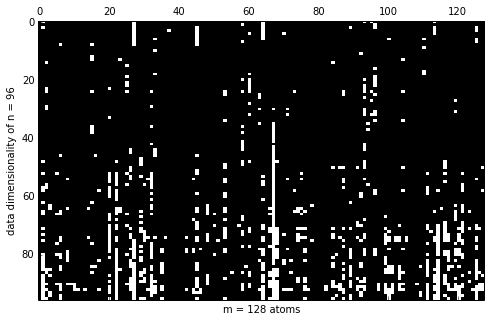

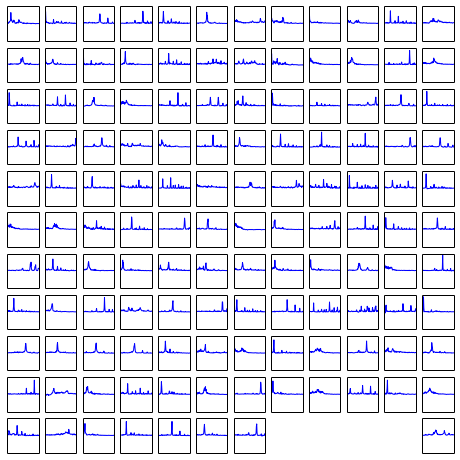

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2644 seconds

 -------------------- Classification, diag = False -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x

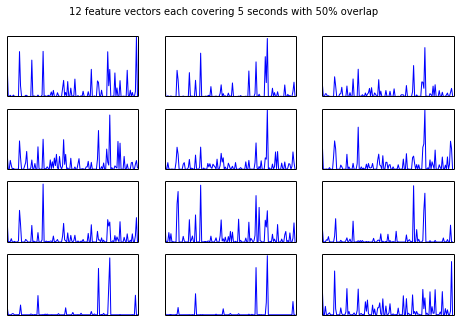

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.2 %
Clips accuracy: 69.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  76 (+/- 1.4) <- [76 77 79 75 73 76 76 76 76 75]
  77 (+/- 1.4) <- [78 78 78 74 79 76 77 77 76 77]
  78 (+/- 1.1) <- [78 77 80 78 77 79 77 76 80 77]
  76 (+/- 1.6) <- [77 72 76 77 75 76 75 76 78 75]
  78 (+/- 1.0) <- [79 77 76 76 77 77 79 78 77 78]
  78 (+/- 1.1) <- [78 77 75 78 79 77 76 79 76 76]
  78 (+/- 1.3) <- [77 76 77 78 78 75 79 77 77 78]
  77 (+/- 1.5) <- [75 76 78 76 75 80 76 76 76 79]
  77 (+/- 1.2) <- [7

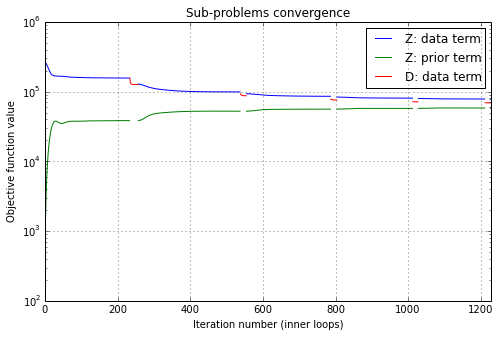

Inner loop: 1230 iterations
g(Z) = ||X-DZ||_2^2 = 6.873128e+04
rdiff: 0.00147064183027
i(Z) = ||Z||_1 = 5.812102e+04
j(Z) = tr(Z^TLZ) = 9.144260e+03


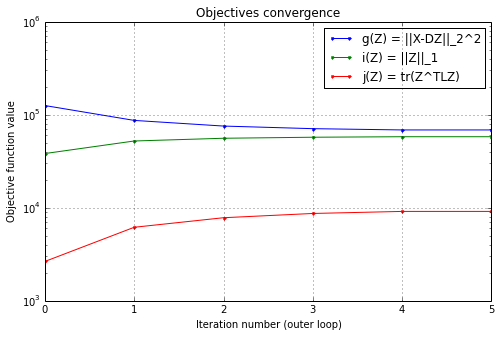

Global objective: 1.359966e+05


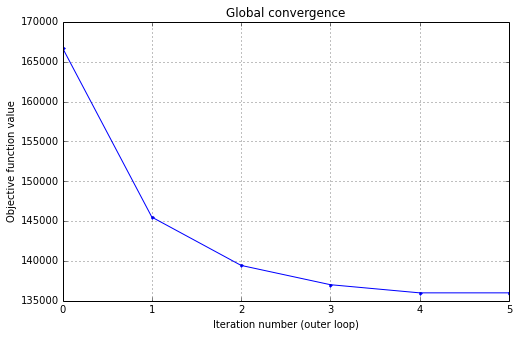

Outer loop: 6 iterations

Z in [-0.166796326637, 1.0182942152]
Sparsity of Z: 3,431,958 non-zero entries out of 19,072,000 entries, i.e. 18.0%.


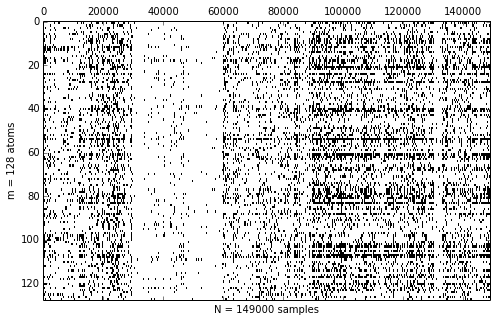

D in [-0.0944681540132, 0.921464562416]
d in [0.999999463558, 1.00000023842]
Constraints on D: True


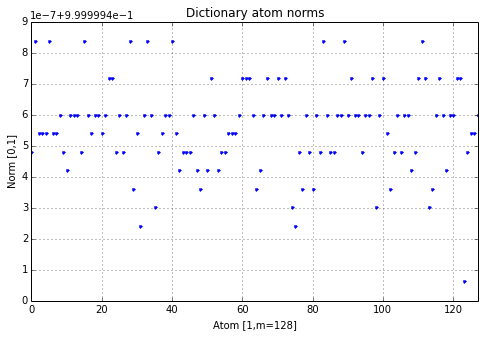

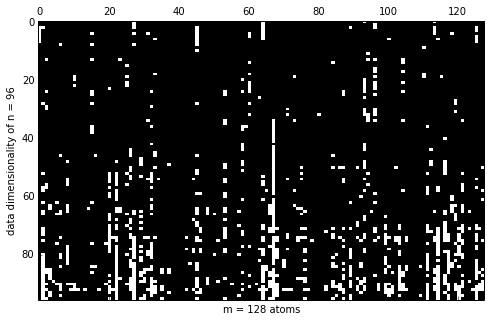

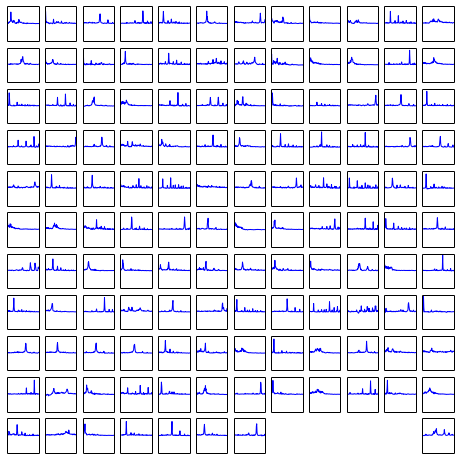

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2684 seconds

 -------------------- Classification, diag = True -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x 

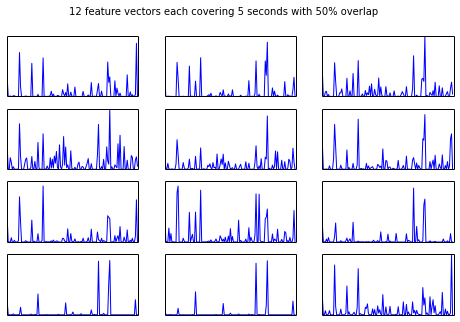

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.0 %
Clips accuracy: 70.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  76 (+/- 1.7) <- [75 75 78 75 72 77 75 78 75 76]
  76 (+/- 1.4) <- [75 77 74 73 76 77 75 75 77 77]
  77 (+/- 1.4) <- [78 75 78 78 77 78 77 74 78 75]
  76 (+/- 1.4) <- [78 73 75 78 75 76 75 77 75 75]
  77 (+/- 1.1) <- [78 76 76 75 76 77 78 78 76 75]
  77 (+/- 1.4) <- [76 76 77 77 77 77 77 79 76 74]
  76 (+/- 1.9) <- [77 73 77 79 77 72 78 76 76 77]
  76 (+/- 0.7) <- [76 76 76 75 76 77 77 76 75 76]
  77 (+/- 1.3) <- [7

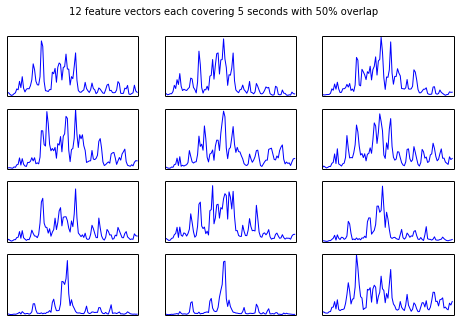

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  69 (+/- 2.2) <- [70 68 71 67 64 67 70 68 72 66]
  69 (+/- 1.4) <- [71 68 67 67 72 69 67 70 69 70]
  70 (+/- 2.0) <- [71 69 73 68 68 71 71 68 71 66]
  69 (+/- 1.4) <- [70 67 66 67 67 70 68 70 70 68]
  70 (+/- 2.4) <- [71 69 72 68 70 75 71 68 68 66]
  71 (+/- 0.7) <- [71 71 70 70 71 71 70 69 70 70]
  70 (+/- 1.4) <- [70 68 72 69 69 67 71 69 70 69]
  70 (+/- 1.5) <- [69 70 68 71 65 70 70 69 70 69]
  69 (+/- 1.7) <- [68 6

In [6]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if regen_baseline:
    res['baseline'] = []
    res['baseline_std'] = []
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
        res['baseline'].append(accuracy)
        res['baseline_std'].append(accuracy_std)
else:
    separator('Baseline')
    %run audio_classification.ipynb
    res['baseline'] = len(Pvalues) * [accuracy]
    res['baseline_std'] = accuracy_std

## Results

diag = [False, True, False, True]
res['accuracy_std'] = [1.436557420440346, 1.5932093309487683, 1.4952886659252258, 1.5595619042966302]
res['objective_j'] = [8606.1363220214844, 8863.5414123535156, 9658.9462280273438, 9144.2604064941406]
res['objective_i'] = [56288.06640625, 56926.68359375, 56714.78515625, 58121.015625]
res['objective_h'] = [0, 0, 0, 0]
res['objective_g'] = [73856.3232421875, 71186.357421875, 73196.669921875, 68731.2841796875]
res['baseline'] = [69.729166666666742, 69.729166666666742, 69.729166666666742, 69.729166666666742]
res['time_features'] = [2454.886491060257, 2743.529349088669, 2634.3452701568604, 2672.729882001877]
res['baseline_std'] = 1.71029866625
res['sparsity'] = [20.629540687919462, 19.48717491610738, 20.00042994966443, 17.994746224832216]
res['iterations_inner'] = [1156, 1285, 1215, 1230]
res['iterations_outer'] = [5, 9, 6, 6]
res['accuracy'] = [76.228333333333339, 78.04583333333332, 77.217499999999973, 76.726666666666674]


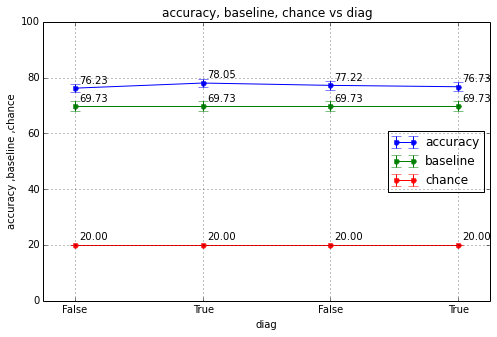

/usr/lib/python2.7/dist-packages/numpy/ma/core.py:3847: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


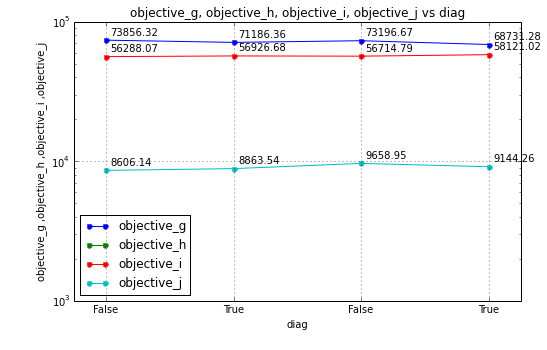

g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)


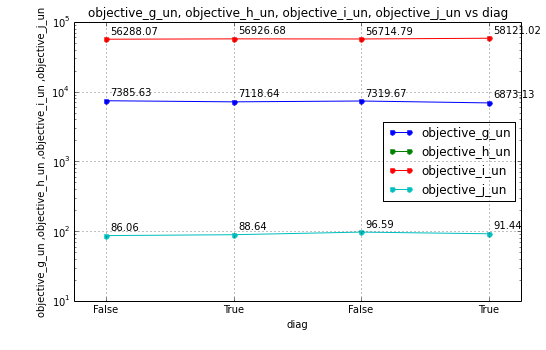

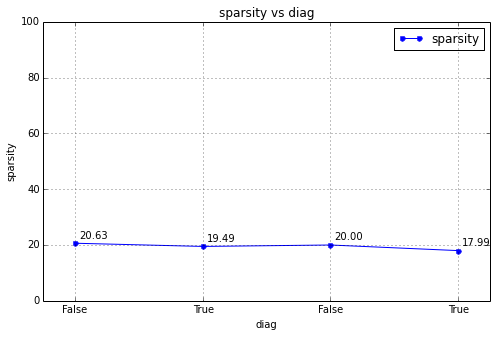

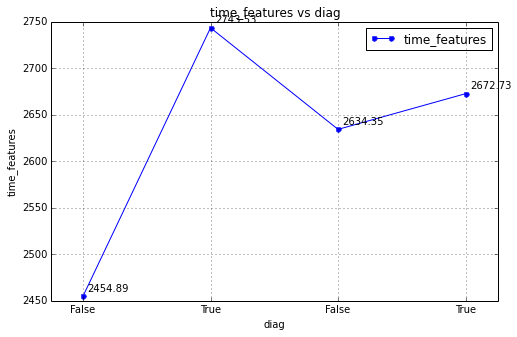

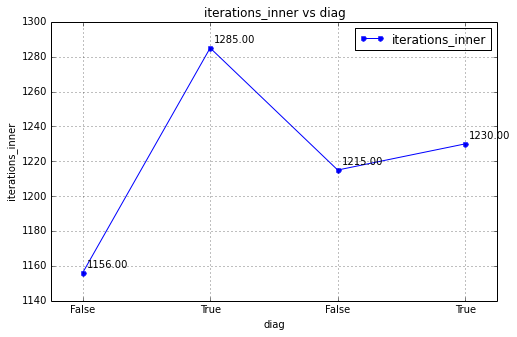

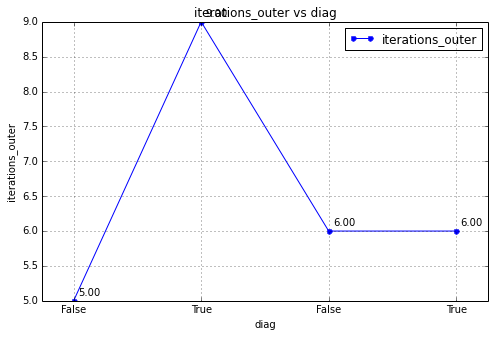

Dictionary atoms for diag = False
Dictionary atoms for diag = True
Dictionary atoms for diag = False
Dictionary atoms for diag = True
Experiment time: 13423 seconds


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [7]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms_D':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

def div(l):
    div = Pvalues if Pname is l else [p[l]]
    return np.array([1 if v is None else v for v in div])

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err, ylim=[0,100])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_h', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    res['objective_g_un'] = res['objective_g'] / div('ld')
    res['objective_h_un'] = res['objective_h'] / div('le')
    res['objective_i_un'] = res['objective_i'] / div('ls')
    res['objective_j_un'] = res['objective_j'] / div('lg')
    plot('objective_g_un', 'objective_h_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity', ylim=[0,100])
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms_D']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))